<h1>Preparação do Ambiente</h1>

<p>Aqui serão carregadas as principais bibliotecas para trabalho e também será importada o dataset</p>

In [2]:
import numpy as np #biblioteca utilizada para algebra linear
import pandas as pd #biblioteca para processamento de dados em planilha
import matplotlib.pyplot as plt #biblioteca de visualização de dados


In [3]:
df = pd.read_csv("./Datasets/Dataset3/Immunotherapy.csv") #importando o dataset

<h1>Descrição Geral do Dataset</h1>

<p>Nesta etapa serão mostrados e descritos os dados do data set para que se possa entender os dados e definir como serão tratados, limpos e normalizados</p>


<h2>Sobre o Dataset</h2>
<p>Como tumores benignos, as verrugas são produzidas pela mediação do Papilomavírus Humano (HPV) e podem crescer em todos os partes do corpo, especialmente nas mãos e pés. Existem vários métodos de tratamento desta doença. No entanto, nenhum deles podem curar todos os pacientes. Consequentemente, os médicos procuram tratamentos mais eficazes e personalizados para cada paciente. Eles estão se esforçando para descobrir quais tratamentos têm melhores impactos em um determinado paciente. O objetivo deste estudo é identificar e prever se a aplicação do tratamento de imunoterapia é adequado para dois tipos comuns de verrugas (plantar e comum). Como trabalho original, o estudo foi realizado em 90 pacientes, com verrugas plantares e comuns, que haviam sido encaminhados para a clínica de dermatologia do Hospital Ghaem, Mashhad, Irã. Neste estudo, os 90 pacientes foram tratados pelo método de imunoterapia. De acordo com os resultados obtidos, os benefícios da este sistema especialista são múltiplos: auxiliando os médicos na seleção do melhor método de tratamento, economizando tempo para pacientes, reduzindo o custo do tratamento e melhorando a qualidade do tratamento.</p>

<h2>Apresentação do Dataset</h2>

<p>Aqui serão exibidos os primeiros dados da tabela com a intenção de se identificar os tipos gerais de dados, as variaveis envolvidas e como estão dispostas<p>
    

In [4]:
df.head(10) #visualiza as primeiras 10 linhas da tabela

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,"2,25",14,3,51,50,1
1,1,15,3,2,3,900,70,1
2,1,16,"10,5",2,1,100,25,1
3,1,27,"4,5",9,3,80,30,1
4,1,20,8,6,1,45,8,1
5,1,15,5,3,3,84,7,1
6,1,35,"9,75",2,2,8,6,1
7,2,28,"7,5",4,1,9,2,1
8,2,19,6,2,1,225,8,1
9,2,32,12,6,3,35,5,0


<h2>O dataset apresenta as seguintes colunas e seus significados respectivamente.</h2>

<ol>
    <li><p><strong>Sex:</strong> Identifica o sexo do paciente analisado, sendo: valor 1 para masculino e 2 para feminino.</p></li>
    <li><p><strong>Age:</strong> Representa a idade do paciente em anos.</p></li>
    <li><p><strong>Time:</strong> Tempo decorrido antes do tratamento em meses.</p></li>
    <li><p><strong>Number_of_Warts:</strong> Representa a quantidade de verrugas presentes em cada paciente.</p></li>
    <li><p><strong>Type:</strong> Identifica o tipo de verruga presente no paciente, sendo: 1 para verrugas do tipo comum, 2 para verrugas do tipo plantar e 3 para a presença dos dois tipos anteriores em conjunto.</p></li>
    <li><p><strong>Area:</strong> Representa a area da superficie da maior verruga presente no paciente em mm².</p></li>
    <li><p><strong>induration_diameter:</strong> Representa o diametro da area endurecida da maior verruga, medido no teste inicial.</p></li>
    <li><p><strong>Result_of_Treatment:</strong> Identifica o resultado do tratamento de imunoterapia, sendo: 0 para fracasso e 1 para sucesso</p></li>
</ol>


In [5]:
df.info() #exibe algumas informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sex                  90 non-null     int64 
 1   age                  90 non-null     int64 
 2   Time                 90 non-null     object
 3   Number_of_Warts      90 non-null     int64 
 4   Type                 90 non-null     int64 
 5   Area                 90 non-null     int64 
 6   induration_diameter  90 non-null     int64 
 7   Result_of_Treatment  90 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 5.8+ KB


<p>Existem na tabela 90 instancias, sendo que, em nenhuma delas existem campos com valores nulos, dessa forma, não precisaremos descartar linhas ou preencher campos artificialmente</p>
<p>Teremos que tratar a coluna Time pois seu tipo de dado foi reconhecido como objetc, impossibilitando a execução de cálculos</p>

<p>----------------------------------------------------------------------------------------------------------------------------------------------</p>


<h1>Fase de pré-processamento</h1>


<h2>Limpeza dos Dados</h2>

<p>Não será excluído nenhum dado do dataset, consideramos que todas as colunas podem sim ter um impacto no resultado final da classificação e devem ser usados para isso, por meio da função Info, pudemos ver também que a planilha não apresenta dados nulos, logo também não será necessário excluir nenhuma linha</p>

<h2>Normalização dos Dados</h2>

<p>O tipo de dados da coluna Time foi identificada como Object, essa coluna deverá ser convertida para float para que seja possivel realizar os calculos com ela. Para isso é necessário primeiro substituir as virgulas por ponto, para que possa se adequar ao formato de números decimais do Python</p>
<p>Os dados que poderia ter sido inseridos de forma categórica como "Sex", "Type" e "Result_of_Treatment" já estão no dataset com valores numéricos atribuidos, então não será necessária nenhuma adaptação</p>

In [6]:
#a coluna Time apresenta o os dados com ",", é preciso converter para "." para que o python entenda como numero
df['Time'] = df['Time'].str.replace(',', '.') 

#convertendo a coluna Time para o tipo numérico (float)
df['Time'] = pd.to_numeric(df['Time'],errors = 'coerce')

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
5,1,15,5.00,3,3,84,7,1
6,1,35,9.75,2,2,8,6,1
7,2,28,7.50,4,1,9,2,1
8,2,19,6.00,2,1,225,8,1
9,2,32,12.00,6,3,35,5,0



<h2>Etapa de Avaliação</h2>

In [7]:
df.describe() #exibe as informações de estatística básica em nosso dataset

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


<p>Aqui analisamos os dados em uma visão geral, dessa análise podemos concluir valores máximos e mínimos estudados e também as médias de valores</p>

<p>Podemos extrair também que algumas colunas como "Area" e "induration_diameter" apresentam alto desvio padrão, ou seja, os valores de seus dados variam muito entre sí.</p>

<h2>Matriz de Correlação</h2>

In [8]:
df.corr()#exibe a matriz de correlação

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
sex,1.000000,0.043682,-0.014825,0.100785,-0.104623,-0.115664,0.015202,0.018831
age,0.043682,1.000000,0.188981,0.000092,-0.056636,-0.064334,-0.007005,-0.188314
Time,-0.014825,0.188981,1.000000,0.050800,-0.262870,-0.047254,-0.183656,-0.361172
Number_of_Warts,0.100785,0.000092,0.050800,1.000000,0.148047,-0.107528,0.062383,-0.047160
Type,-0.104623,-0.056636,-0.262870,0.148047,1.000000,-0.042080,0.205546,0.083396
Area,-0.115664,-0.064334,-0.047254,-0.107528,-0.042080,1.000000,0.119262,0.043349
induration_diameter,0.015202,-0.007005,-0.183656,0.062383,0.205546,0.119262,1.000000,-0.031273
Result_of_Treatment,0.018831,-0.188314,-0.361172,-0.047160,0.083396,0.043349,-0.031273,1.000000


<p>Tentamos identificar se existe alguma correlação linear entre as colunas de dados, aparentemente podem existir as seguintes correlações que deverão receber mais atenção na etapa de análise.</p>

<ol>
    <li>sex - Number_of_Warts</li>
    <li>sex - Type</li>
    <li>sex - Area</li>
    <li>Age - Result_of_Treatment</li>
    <li>Number_of_Warts - Type</li>
    <li>Number_of_Warts - Area</li>
    <li>Type - induration_diameter</li>
    <li>Area - induration_diameter</li>
</ol>

<p>A coluna <strong>"Time"</strong> aparenta ter maior correlação linear com as outras colunas</p>

<p>Porém ainda assim são relações fracas.</p>


<h2>Apresentação Visual dos Dados</h2>

<p>A seguir serão apresentados os dados agregados de forma simples, isso servirá para identificarmos como está nosso dataset</p>

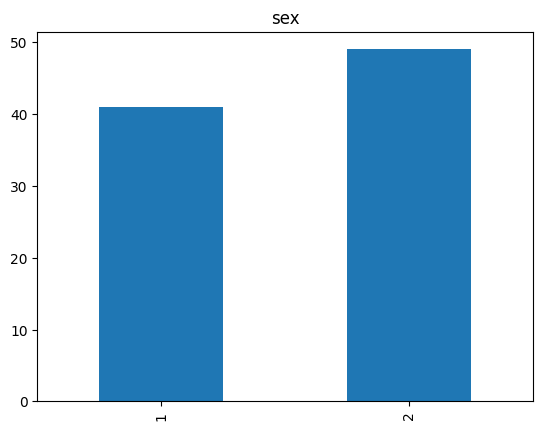

In [9]:
sex = df["sex"].value_counts().sort_index()
sex.plot.bar()
plt.title("sex")
plt.show()

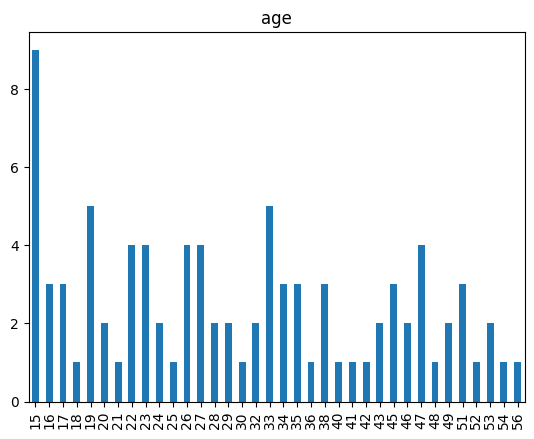

In [10]:
age = df["age"].value_counts().sort_index()
age.plot.bar()
plt.title("age")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

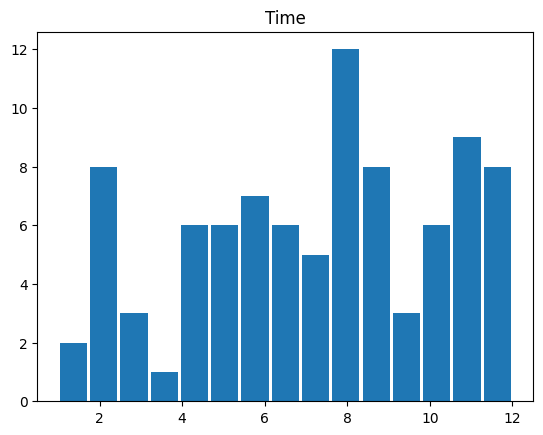

In [11]:
plt.hist(df["Time"],15,rwidth=0.9) #exibe o histograma com 15 classes)
plt.title("Time")
plt.show


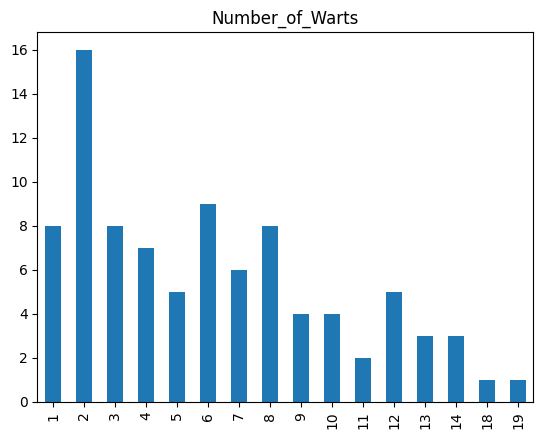

In [12]:
Number_of_Warts = df["Number_of_Warts"].value_counts().sort_index()
Number_of_Warts.plot.bar()
plt.title("Number_of_Warts")
plt.show()


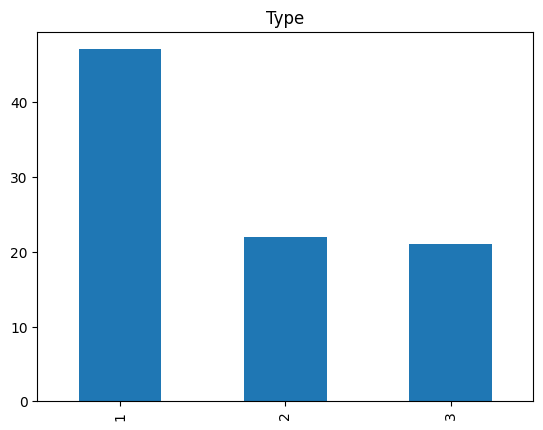

In [13]:
Type = df["Type"].value_counts().sort_index()
Type.plot.bar()
plt.title("Type")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

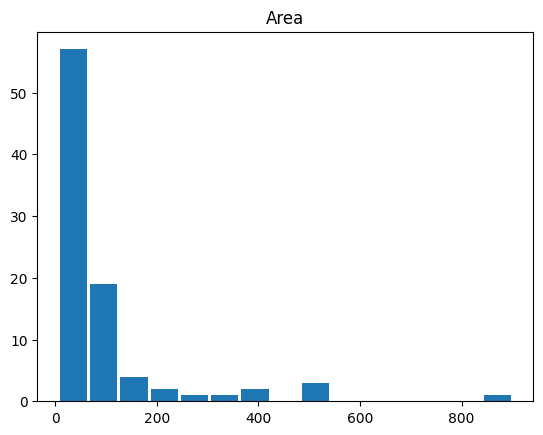

In [14]:
plt.hist(df["Area"],15,rwidth=0.9) #exibe o histograma com 15 classes)
plt.title("Area")
plt.show

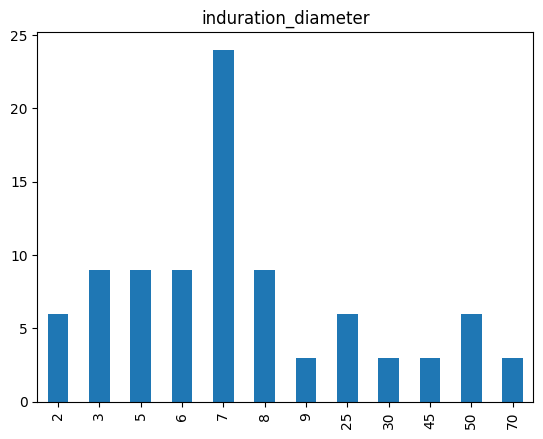

In [15]:
induration_diameter = df["induration_diameter"].value_counts().sort_index()
induration_diameter.plot.bar()
plt.title("induration_diameter")
plt.show()

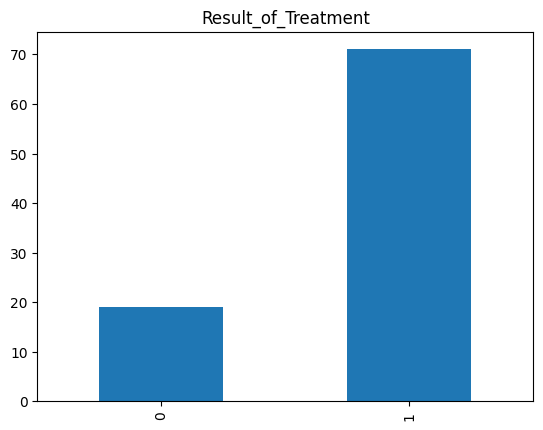

In [16]:
Result_of_Treatment = df["Result_of_Treatment"].value_counts().sort_index()
Result_of_Treatment.plot.bar()
plt.title("Result_of_Treatment")
plt.show()


<p>Essa visualização do resultado nos mostra que nosso dataset é desbalanceado, o que pode prejudicar a implementação de alguns modelos, em uma das análises finais será feito o balanceamento via SMOTE para verificação do impacto</p>

<p>A seguir exibiremos todas as categorias agrupados por Sucesso ou Fracasso do tratamento, isso nos ajudará a identificar quais variaveis maior impacto no resultado final</p>

In [17]:
df_resultado_sucesso = df[df["Result_of_Treatment"]==1]
df_resultado_fracasso = df[df["Result_of_Treatment"]==0]

<function matplotlib.pyplot.show(close=None, block=None)>

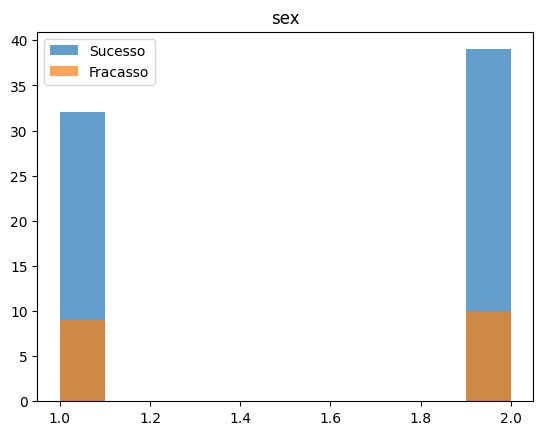

In [18]:
    plt.hist(df_resultado_sucesso["sex"],alpha = 0.7)
    plt.hist(df_resultado_fracasso["sex"],alpha = 0.7)
    plt.title("sex")
    plt.legend(["Sucesso","Fracasso"])
    plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

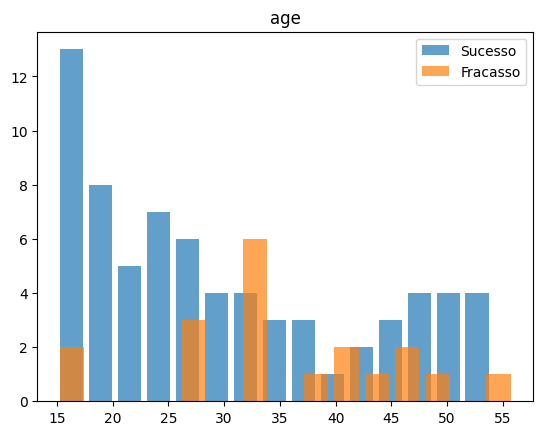

In [19]:
    plt.hist(df_resultado_sucesso["age"],15,rwidth=0.8,alpha = 0.7)
    plt.hist(df_resultado_fracasso["age"],15,rwidth=0.8, alpha = 0.7)
    plt.title("age")
    plt.legend(["Sucesso","Fracasso"])
    plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

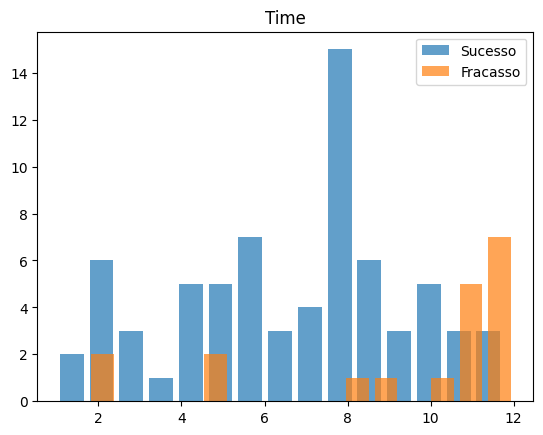

In [20]:
    plt.hist(df_resultado_sucesso["Time"],15,rwidth=0.8,alpha = 0.7)
    plt.hist(df_resultado_fracasso["Time"],15,rwidth=0.8, alpha = 0.7)
    plt.title("Time")
    plt.legend(["Sucesso","Fracasso"])
    plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

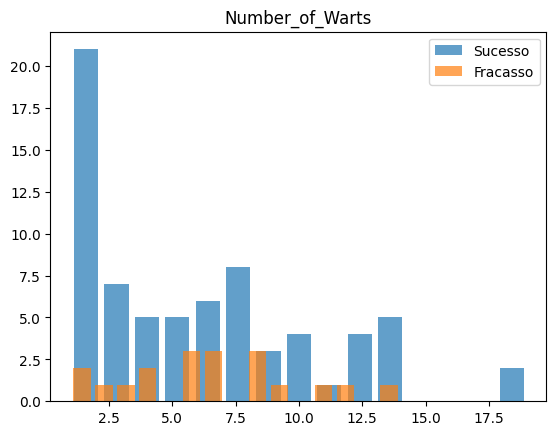

In [21]:
    plt.hist(df_resultado_sucesso["Number_of_Warts"],15,rwidth=0.8,alpha = 0.7)
    plt.hist(df_resultado_fracasso["Number_of_Warts"],15,rwidth=0.8, alpha = 0.7)
    plt.title("Number_of_Warts")
    plt.legend(["Sucesso","Fracasso"])
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

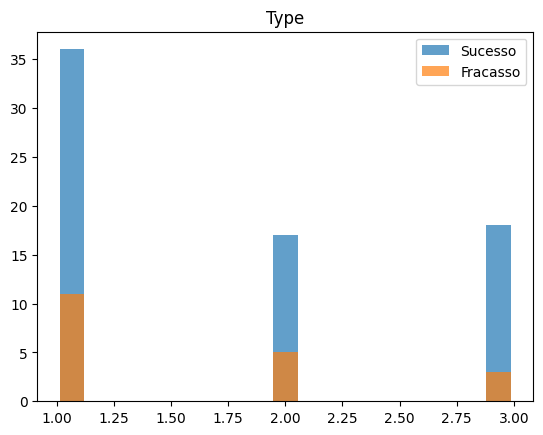

In [22]:
    plt.hist(df_resultado_sucesso["Type"],15,rwidth=0.8,alpha = 0.7)
    plt.hist(df_resultado_fracasso["Type"],15,rwidth=0.8, alpha = 0.7)
    plt.title("Type")
    plt.legend(["Sucesso","Fracasso"])
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

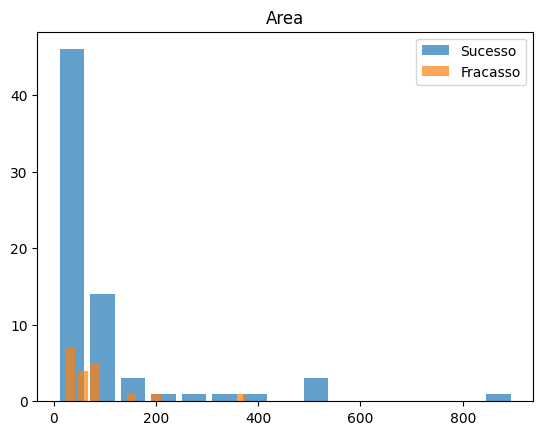

In [23]:
    plt.hist(df_resultado_sucesso["Area"],15,rwidth=0.8,alpha = 0.7)
    plt.hist(df_resultado_fracasso["Area"],15,rwidth=0.8, alpha = 0.7)
    plt.title("Area")
    plt.legend(["Sucesso","Fracasso"])
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

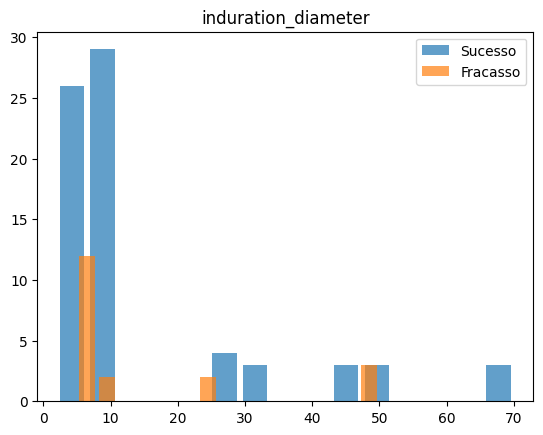

In [24]:
    plt.hist(df_resultado_sucesso["induration_diameter"],15,rwidth=0.8,alpha = 0.7)
    plt.hist(df_resultado_fracasso["induration_diameter"],15,rwidth=0.8, alpha = 0.7)
    plt.title("induration_diameter")
    plt.legend(["Sucesso","Fracasso"])
    plt.show

<p>----------------------------------------------------------------------------------------------------------------------------------------------</p>
<h1>ANÁLISE 1</h1>
<h1>Fase de Análise</h1>

<h2>Seleção de Atributos</h2>

<p>Nessa primeira análise serão selecionados e submetidos ao treinamento, apenas as colunas "age", "Time" e "Type", já que foram as que apresentaram maior correlação linear com o resutado do tratamento

In [25]:
df_selected = df[['age','Time','Type','Result_of_Treatment']]
df_selected

,age,Time,Type,Result_of_Treatment
0,22,2.25,3,1
1,15,3.00,3,1
2,16,10.50,1,1
3,27,4.50,3,1
4,20,8.00,1,1
...,...,...,...,...
85,40,5.50,3,1
86,38,7.50,2,1
87,46,11.50,1,0
88,32,12.00,1,0


In [26]:
#criar conjunto de teste e treino manualmente

from sklearn.model_selection import train_test_split

x = df_selected.drop(['Result_of_Treatment'], axis=1)

In [27]:
y = df_selected['Result_of_Treatment']

In [28]:
#criar conjunto de teste e treino

x_train, x_test, y_train, y_test = train_test_split(x,y)

<h2>Escolha e Preparação do Modelo</h2>

<h2>KNeighbors</h2>

<h3>Fase de Treinamento do Modelo</h3>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#1-Criando uma instancia do modelo
modelo = KNeighborsClassifier(3)

#2-Treinando o modelo
modelo.fit(x_train, y_train)

#3-Calcular as métricas do modelo
y_pred = modelo.predict(x_train)

In [30]:
print("\nMatriz de Confusão:\n",confusion_matrix(y_train, y_pred))
print("\nAcuracia:\n", accuracy_score(y_train, y_pred))
print("\nPrecisão:\n", precision_score(y_train, y_pred, average=None))
print("\nRecall:\n", recall_score(y_train, y_pred, average=None))
print("\nF1 Score:\n", f1_score(y_train, y_pred, average=None))



Matriz de Confusão:
 [[ 6  6]
 [ 0 55]]

Acuracia:
 0.9104477611940298

Precisão:
 [1.         0.90163934]

Recall:
 [0.5 1. ]

F1 Score:
 [0.66666667 0.94827586]


<h3>Fase de Teste do Modelo</h3>

In [31]:
#prever com os valores do dataset de teste
y_pred = modelo.predict(x_test)

In [32]:
KNN_A1 = accuracy_score(y_test, y_pred)
KNN_P1 = precision_score(y_test, y_pred, average=None)
KNN_R1 = recall_score(y_test, y_pred, average=None)
KNN_F1 = f1_score(y_test, y_pred, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test, y_pred))
print("\nAcuracia:\n", KNN_A1)
print("\nPrecisão:\n", KNN_P1)
print("\nRecall:\n", KNN_R1)
print("\nF1 Score:\n", KNN_F1)


Matriz de Confusão:
 [[ 1  6]
 [ 0 16]]

Acuracia:
 0.7391304347826086

Precisão:
 [1.         0.72727273]

Recall:
 [0.14285714 1.        ]

F1 Score:
 [0.25       0.84210526]


<h2>Decision Tree </h2>

<h3>Fase de Treinamento do Modelo</h3>

In [33]:
from sklearn.tree import DecisionTreeClassifier

#1-Criando uma instancia do modelo
arvore = DecisionTreeClassifier()

#2-Treinando o modelo
arvore.fit(x_train, y_train)

#3-Calcular as métricas do modelo
y_pred2 = arvore.predict(x_train)


In [34]:
print("\nMatriz de Confusão:\n",confusion_matrix(y_train, y_pred2))
print("\nAcuracia:\n", accuracy_score(y_train, y_pred2))
print("\nPrecisão:\n", precision_score(y_train, y_pred2, average=None))
print("\nRecall:\n", recall_score(y_train, y_pred2, average=None))
print("\nF1 Score:\n", f1_score(y_train, y_pred2, average=None))



Matriz de Confusão:
 [[12  0]
 [ 0 55]]

Acuracia:
 1.0

Precisão:
 [1. 1.]

Recall:
 [1. 1.]

F1 Score:
 [1. 1.]


<h3>Fase de Teste do Modelo</h3>

In [35]:
#prever com os valores do dataset de teste
y_pred2 = arvore.predict(x_test)


In [36]:
DT_A1 = accuracy_score(y_test, y_pred2)
DT_P1 = precision_score(y_test, y_pred2, average=None)
DT_R1 = recall_score(y_test, y_pred2, average=None)
DT_F1 = f1_score(y_test, y_pred2, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test, y_pred2))
print("\nAcuracia:\n", DT_A1)
print("\nPrecisão:\n", DT_P1)
print("\nRecall:\n", DT_R1)
print("\nF1 Score:\n", DT_F1)




Matriz de Confusão:
 [[ 1  6]
 [ 3 13]]

Acuracia:
 0.6086956521739131

Precisão:
 [0.25       0.68421053]

Recall:
 [0.14285714 0.8125    ]

F1 Score:
 [0.18181818 0.74285714]


<h2> SVM - Support Vector Machines </h2>

<p>A SVM é uma tecnica de regressão ou classificação (O SVC trabalhado nesse estudo, utiliza o modelo de classificação) que constrói hiperplanos em um espaço n-dimensional para classificar dados.</p>
<p>Esse modelo busca criar uma linha de separação entre diferentes classes, ao entrarem novos objetos na análise, estes serão classificados pela divisão das linhas (hiperplanos) em seu respectivo grupo, o que caracteriza um classificador linear.</p>

<p>Esse modelo foi selecionado pois a separação linear parece ser uma boa solução para um conjunto de dados com resultado binário</p>

<h3>Fase de Treinamento do Modelo</h3>

In [37]:
from sklearn.svm import SVC

#1-Criando uma instancia do modelo
svc = SVC(C=100)

#2-Treinando o modelo
svc.fit(x_train, y_train)

#3-Calcular as métricas do modelo
y_pred3 = svc.predict(x_train)

In [38]:
print("\nMatriz de Confusão:\n",confusion_matrix(y_train, y_pred3))
print("\nAcuracia:\n", accuracy_score(y_train, y_pred3))
print("\nPrecisão:\n", precision_score(y_train, y_pred3, average=None))
print("\nRecall:\n", recall_score(y_train, y_pred3, average=None))
print("\nF1 Score:\n", f1_score(y_train, y_pred3, average=None))


Matriz de Confusão:
 [[ 6  6]
 [ 1 54]]

Acuracia:
 0.8955223880597015

Precisão:
 [0.85714286 0.9       ]

Recall:
 [0.5        0.98181818]

F1 Score:
 [0.63157895 0.93913043]


<h3>Fase de Teste do Modelo</h3>

In [39]:
y_pred3 = svc.predict(x_test)

In [40]:
SVM_A1 = accuracy_score(y_test, y_pred3)
SVM_P1 = precision_score(y_test, y_pred3, average=None)
SVM_R1 = recall_score(y_test, y_pred3, average=None)
SVM_F1 = f1_score(y_test, y_pred3, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test, y_pred3))
print("\nAcuracia:\n", SVM_A1)
print("\nPrecisão:\n", SVM_P1)
print("\nRecall:\n",SVM_R1)
print("\nF1 Score:\n",SVM_F1)



Matriz de Confusão:
 [[ 2  5]
 [ 3 13]]

Acuracia:
 0.6521739130434783

Precisão:
 [0.4        0.72222222]

Recall:
 [0.28571429 0.8125    ]

F1 Score:
 [0.33333333 0.76470588]


<p>----------------------------------------------------------------------------------------------------------------------------------------------</p>
<h1>ANÁLISE 2</h1>
<h1>Fase de Análise</h1>

<h2>Seleção de Atributos</h2>

<p>Nessa análise serão considerados também os atributos "Number_of_Warts" e "Area", para avaliação do impacto da adição de atributos de baixa correlação com a classificação final.



In [41]:
df_selected2 = df[['age','Time','Type','Number_of_Warts','Area','Result_of_Treatment']]
df_selected2

,age,Time,Type,Number_of_Warts,Area,Result_of_Treatment
0,22,2.25,3,14,51,1
1,15,3.00,3,2,900,1
2,16,10.50,1,2,100,1
3,27,4.50,3,9,80,1
4,20,8.00,1,6,45,1
...,...,...,...,...,...,...
85,40,5.50,3,8,69,1
86,38,7.50,2,8,56,1
87,46,11.50,1,4,91,0
88,32,12.00,1,9,43,0


In [42]:
#criar conjunto de teste e treino manualmente

from sklearn.model_selection import train_test_split

x2 = df_selected2.drop(['Result_of_Treatment'], axis=1)
y2 = df_selected2['Result_of_Treatment']

In [43]:
#criar conjunto de teste e treino

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2)

<h2>Escolha e Preparação do Modelo</h2>

<h2>KNeighbors</h2>

<h3>Fase de Treinamento do Modelo</h3>

In [44]:
#1-Criando uma instancia do modelo
modelo2 = KNeighborsClassifier(3)

#2-Treinando o modelo
modelo2.fit(x_train2, y_train2)

#3-Calcular as métricas do modelo
y_pred4 = modelo2.predict(x_train2)

In [45]:
print("\nMatriz de Confusão:\n",confusion_matrix(y_train2, y_pred4))
print("\nAcuracia:\n", accuracy_score(y_train2, y_pred4))
print("\nPrecisão:\n", precision_score(y_train2, y_pred4, average=None))
print("\nRecall:\n", recall_score(y_train2, y_pred4, average=None))
print("\nF1 Score:\n", f1_score(y_train2, y_pred4, average=None))


Matriz de Confusão:
 [[ 7  9]
 [ 5 46]]

Acuracia:
 0.7910447761194029

Precisão:
 [0.58333333 0.83636364]

Recall:
 [0.4375     0.90196078]

F1 Score:
 [0.5        0.86792453]


<h3>Fase de Teste do Modelo</h3>

In [46]:
#prever com os valores do dataset de teste
y_pred4 = modelo2.predict(x_test2)

In [47]:
KNN_A2 = accuracy_score(y_test2, y_pred4)
KNN_P2 = precision_score(y_test2, y_pred4, average=None)
KNN_R2 = recall_score(y_test2, y_pred4, average=None)
KNN_F2 = f1_score(y_test2, y_pred4, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test2, y_pred4))
print("\nAcuracia:\n", KNN_A2)
print("\nPrecisão:\n", KNN_P2)
print("\nRecall:\n", KNN_R2)
print("\nF1 Score:\n", KNN_F2)


Matriz de Confusão:
 [[ 0  3]
 [ 1 19]]

Acuracia:
 0.8260869565217391

Precisão:
 [0.         0.86363636]

Recall:
 [0.   0.95]

F1 Score:
 [0.        0.9047619]


<h2>Decision Tree </h2>

<h3>Fase de Treinamento do Modelo</h3>

In [48]:
#1-Criando uma instancia do modelo
arvore2 = DecisionTreeClassifier()

#2-Treinando o modelo
arvore2.fit(x_train2, y_train2)

#3-Calcular as métricas do modelo
y_pred5 = arvore2.predict(x_train2)



In [49]:
print("\nMatriz de Confusão:\n",confusion_matrix(y_train2, y_pred5))
print("\nAcuracia:\n", accuracy_score(y_train2, y_pred5))
print("\nPrecisão:\n", precision_score(y_train2, y_pred5, average=None))
print("\nRecall:\n", recall_score(y_train2, y_pred5, average=None))
print("\nF1 Score:\n", f1_score(y_train2, y_pred5, average=None))


Matriz de Confusão:
 [[16  0]
 [ 0 51]]

Acuracia:
 1.0

Precisão:
 [1. 1.]

Recall:
 [1. 1.]

F1 Score:
 [1. 1.]


<h3>Fase de Teste do Modelo</h3>

In [50]:
#prever com os valores do dataset de teste
y_pred5 = arvore2.predict(x_test2)

In [51]:
DT_A2 = accuracy_score(y_test2, y_pred5)
DT_P2 = precision_score(y_test2, y_pred5, average=None)
DT_R2 = recall_score(y_test2, y_pred5, average=None)
DT_F2 = f1_score(y_test2, y_pred5, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test2, y_pred5))
print("\nAcuracia:\n", DT_A2)
print("\nPrecisão:\n", DT_P2)
print("\nRecall:\n", DT_R2)
print("\nF1 Score:\n", DT_F2)


Matriz de Confusão:
 [[ 1  2]
 [ 2 18]]

Acuracia:
 0.8260869565217391

Precisão:
 [0.33333333 0.9       ]

Recall:
 [0.33333333 0.9       ]

F1 Score:
 [0.33333333 0.9       ]


<h2> SVM - Support Vector Machines </h2>

<h3>Fase de Treinamento do Modelo</h3>

In [52]:
#1-Criando uma instancia do modelo
svc2 = SVC(C=1000)

#2-Treinando o modelo
svc2.fit(x_train2, y_train2)

#3-Calcular as métricas do modelo
y_pred6 = svc2.predict(x_train2)

In [53]:
print("\nMatriz de Confusão:\n",confusion_matrix(y_train2, y_pred6))
print("\nAcuracia:\n", accuracy_score(y_train2, y_pred6))
print("\nPrecisão:\n", precision_score(y_train2, y_pred6, average=None))
print("\nRecall:\n", recall_score(y_train2, y_pred6, average=None))
print("\nF1 Score:\n", f1_score(y_train2, y_pred6, average=None))


Matriz de Confusão:
 [[11  5]
 [ 2 49]]

Acuracia:
 0.8955223880597015

Precisão:
 [0.84615385 0.90740741]

Recall:
 [0.6875     0.96078431]

F1 Score:
 [0.75862069 0.93333333]


<h3>Fase de Teste do Modelo</h3>

In [54]:
y_pred6 = svc2.predict(x_test2)

In [55]:
SVM_A2 = accuracy_score(y_test2, y_pred6)
SVM_P2 = precision_score(y_test2, y_pred6, average=None)
SVM_R2 = recall_score(y_test2, y_pred6, average=None)
SVM_F2 = f1_score(y_test2, y_pred6, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test2, y_pred6))
print("\nAcuracia:\n", SVM_A2)
print("\nPrecisão:\n", SVM_P2)
print("\nRecall:\n", SVM_R2)
print("\nF1 Score:\n", SVM_F2)


Matriz de Confusão:
 [[ 1  2]
 [ 2 18]]

Acuracia:
 0.8260869565217391

Precisão:
 [0.33333333 0.9       ]

Recall:
 [0.33333333 0.9       ]

F1 Score:
 [0.33333333 0.9       ]


<p>----------------------------------------------------------------------------------------------------------------------------------------------</p>
<h1>ANÁLISE 3</h1>
<h1>Fase de Análise</h1>

<h2>Seleção de Atributos</h2>

<p>Nessa análise será feito um SMOTE para balenceamento artificial dos dados e verificação do resultado da aplicação dos algoritmos de classificação no novo conjunto</p>


In [56]:
df_selected3 = df[['age','Time','Type','Result_of_Treatment']]
df_selected3

,age,Time,Type,Result_of_Treatment
0,22,2.25,3,1
1,15,3.00,3,1
2,16,10.50,1,1
3,27,4.50,3,1
4,20,8.00,1,1
...,...,...,...,...
85,40,5.50,3,1
86,38,7.50,2,1
87,46,11.50,1,0
88,32,12.00,1,0


In [57]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [58]:
x3 = df_selected3.drop(['Result_of_Treatment'], axis=1)
y3 = df_selected3['Result_of_Treatment']

In [59]:
#criar conjunto de teste e treino

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3)

In [60]:
#SMOTE
smote = SMOTE(random_state = 42)
x3_smo, y3_smo = smote.fit_resample(x_train3, y_train3)

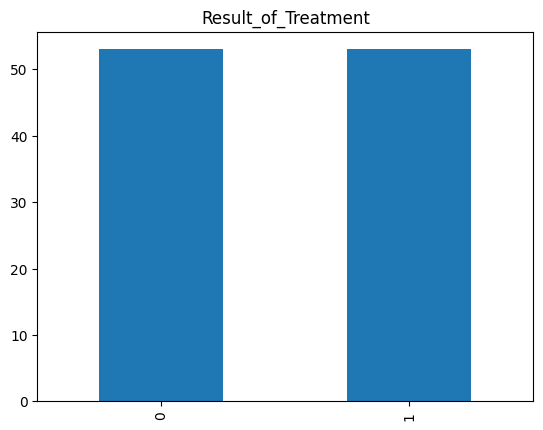

In [61]:
Result_of_Treatment = y3_smo.value_counts().sort_index()
Result_of_Treatment.plot.bar()
plt.title("Result_of_Treatment")
plt.show()

<h2>Escolha e Preparação do Modelo</h2>

<h2>KNeighbors</h2>

<h3>Fase de Treinamento do Modelo</h3>

In [62]:
#1-Criando uma instancia do modelo
modelo3 = KNeighborsClassifier(3)

#2-Treinando o modelo
modelo3.fit(x3_smo, y3_smo)

#3-Calcular as métricas do modelo
y_pred7 = modelo3.predict(x3_smo)

In [63]:
print("\nMatriz de Confusão:\n",confusion_matrix(y3_smo, y_pred7))
print("\nAcuracia:\n", accuracy_score(y3_smo, y_pred7))
print("\nPrecisão:\n", precision_score(y3_smo, y_pred7, average=None))
print("\nRecall:\n", recall_score(y3_smo, y_pred7, average=None))
print("\nF1 Score:\n", f1_score(y3_smo, y_pred7, average=None))


Matriz de Confusão:
 [[48  5]
 [ 8 45]]

Acuracia:
 0.8773584905660378

Precisão:
 [0.85714286 0.9       ]

Recall:
 [0.90566038 0.8490566 ]

F1 Score:
 [0.88073394 0.87378641]


<h3>Fase de Teste do Modelo</h3>

In [64]:
#prever com os valores do dataset de teste
y_pred7 = modelo3.predict(x_test3)

In [65]:
KNN_A3 = accuracy_score(y_test3, y_pred7)
KNN_P3 = precision_score(y_test3, y_pred7, average=None)
KNN_R3 = recall_score(y_test3, y_pred7, average=None)
KNN_F3 = f1_score(y_test3, y_pred7, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test3, y_pred7))
print("\nAcuracia:\n", KNN_A3)
print("\nPrecisão:\n", KNN_P3)
print("\nRecall:\n", KNN_R3)
print("\nF1 Score:\n", KNN_F3)


Matriz de Confusão:
 [[ 3  2]
 [ 5 13]]

Acuracia:
 0.6956521739130435

Precisão:
 [0.375      0.86666667]

Recall:
 [0.6        0.72222222]

F1 Score:
 [0.46153846 0.78787879]


<h2>Decision Tree</h2>

<h3>Fase de Treinamento do Modelo</h3>

In [66]:
#1-Criando uma instancia do modelo
arvore3 = DecisionTreeClassifier()

#2-Treinando o modelo
arvore3.fit(x3_smo, y3_smo)

#3-Calcular as métricas do modelo
y_pred8 = arvore3.predict(x3_smo)

In [67]:
print("\nMatriz de Confusão:\n", confusion_matrix(y3_smo, y_pred8))
print("\nAcuracia:\n", accuracy_score(y3_smo, y_pred8))
print("\nPrecisão:\n", precision_score(y3_smo, y_pred8, average=None))
print("\nRecall:\n", recall_score(y3_smo, y_pred8, average=None))
print("\nF1 Score:\n", f1_score(y3_smo, y_pred8, average=None))


Matriz de Confusão:
 [[53  0]
 [ 0 53]]

Acuracia:
 1.0

Precisão:
 [1. 1.]

Recall:
 [1. 1.]

F1 Score:
 [1. 1.]


<h3>Fase de Teste do Modelo</h3>

In [68]:
#prever com os valores do dataset de teste
y_pred8 = arvore3.predict(x_test3)

In [69]:
DT_A3 = accuracy_score(y_test3, y_pred8)
DT_P3 = precision_score(y_test3, y_pred8, average=None)
DT_R3 = recall_score(y_test3, y_pred8, average=None)
DT_F3 = f1_score(y_test3, y_pred8, average=None)

print("\nMatriz de Confusão:\n", confusion_matrix(y_test3, y_pred8))
print("\nAcuracia:\n", DT_A3)
print("\nPrecisão:\n", DT_P3)
print("\nRecall:\n", DT_R3)
print("\nF1 Score:\n", DT_F3)


Matriz de Confusão:
 [[ 3  2]
 [ 3 15]]

Acuracia:
 0.782608695652174

Precisão:
 [0.5        0.88235294]

Recall:
 [0.6        0.83333333]

F1 Score:
 [0.54545455 0.85714286]


<h2> SVM - Support Vector Machines </h2>

<h3>Fase de Treinamento do Modelo</h3>

In [70]:
#1-Criando uma instancia do modelo
svc3 = SVC(C=1000)

#2-Treinando o modelo
svc3.fit(x3_smo, y3_smo)

#3-Calcular as métricas do modelo
y_pred9 = svc3.predict(x3_smo)

In [71]:
print("\nMatriz de Confusão:\n",confusion_matrix(y3_smo, y_pred9))
print("\nAcuracia:\n", accuracy_score(y3_smo, y_pred9))
print("\nPrecisão:\n", precision_score(y3_smo, y_pred9, average=None))
print("\nRecall:\n", recall_score(y3_smo, y_pred9, average=None))
print("\nF1 Score:\n", f1_score(y3_smo, y_pred9, average=None))


Matriz de Confusão:
 [[46  7]
 [ 8 45]]

Acuracia:
 0.8584905660377359

Precisão:
 [0.85185185 0.86538462]

Recall:
 [0.86792453 0.8490566 ]

F1 Score:
 [0.85981308 0.85714286]


<h3>Fase de Teste do Modelo</h3>

In [72]:
#prever com os valores do dataset de teste
y_pred9 = svc3.predict(x_test3)

In [73]:
SVM_A3 = accuracy_score(y_test3, y_pred9)
SVM_P3 = precision_score(y_test3, y_pred9, average=None)
SVM_R3 = recall_score(y_test3, y_pred9, average=None)
SVM_F3 = f1_score(y_test3, y_pred9, average=None)

print("\nMatriz de Confusão:\n",confusion_matrix(y_test3, y_pred9))
print("\nAcuracia:\n", SVM_A3)
print("\nPrecisão:\n", SVM_P3)
print("\nRecall:\n", SVM_R3)
print("\nF1 Score:\n", SVM_F3)


Matriz de Confusão:
 [[ 3  2]
 [ 2 16]]

Acuracia:
 0.8260869565217391

Precisão:
 [0.6        0.88888889]

Recall:
 [0.6        0.88888889]

F1 Score:
 [0.6        0.88888889]


<h1>Fase de Conlusão</h1>

<h2>Comparação dos Resultados</h2>

<h3>Resultados KNN</h3>

In [74]:
data_knn = {'ANALISE 1': [KNN_A1, KNN_P1, KNN_R1, KNN_F1], 'ANÁLISE 2': [KNN_A2, KNN_P2, KNN_R2, KNN_F2], 'ANÁLISE 3': [KNN_A3, KNN_P3, KNN_R3, KNN_F3]}

knn_df = pd.DataFrame(data= data_knn, index=["ACURACIA", "PRECISAO", "RECALL", "F1 SCORE"])

knn_df

,ANALISE 1,ANÁLISE 2,ANÁLISE 3
ACURACIA,0.73913,0.826087,0.695652
PRECISAO,"[1.0, 0.7272727272727273]","[0.0, 0.8636363636363636]","[0.375, 0.8666666666666667]"
RECALL,"[0.14285714285714285, 1.0]","[0.0, 0.95]","[0.6, 0.7222222222222222]"
F1 SCORE,"[0.25, 0.8421052631578948]","[0.0, 0.9047619047619048]","[0.4615384615384615, 0.7878787878787877]"


<h3>Resultados Decision Tree</h3>

In [75]:
data_dt = {'ANALISE 1': [DT_A1, DT_P1, DT_R1, DT_F1], 'ANÁLISE 2': [DT_A2, DT_P2, DT_R2, DT_F2], 'ANÁLISE 3': [DT_A3, DT_P3, DT_R3, DT_F3]}

dt_df = pd.DataFrame(data= data_dt, index=["ACURACIA", "PRECISAO", "RECALL", "F1 SCORE"])

dt_df

,ANALISE 1,ANÁLISE 2,ANÁLISE 3
ACURACIA,0.608696,0.826087,0.782609
PRECISAO,"[0.25, 0.6842105263157895]","[0.3333333333333333, 0.9]","[0.5, 0.8823529411764706]"
RECALL,"[0.14285714285714285, 0.8125]","[0.3333333333333333, 0.9]","[0.6, 0.8333333333333334]"
F1 SCORE,"[0.18181818181818182, 0.742857142857143]","[0.3333333333333333, 0.9]","[0.5454545454545454, 0.8571428571428571]"


<h3>Resultados SVM</h3>

In [76]:
data_svm = {'ANALISE 1': [SVM_A1, SVM_P1, SVM_R1, SVM_F1], 'ANÁLISE 2': [SVM_A2, SVM_P2, SVM_R2, SVM_F2], 'ANÁLISE 3': [SVM_A3, SVM_P3, SVM_R3, SVM_F3]}

svm_df = pd.DataFrame(data= data_svm, index=["ACURACIA", "PRECISAO", "RECALL", "F1 SCORE"])

svm_df

,ANALISE 1,ANÁLISE 2,ANÁLISE 3
ACURACIA,0.652174,0.826087,0.826087
PRECISAO,"[0.4, 0.7222222222222222]","[0.3333333333333333, 0.9]","[0.6, 0.8888888888888888]"
RECALL,"[0.2857142857142857, 0.8125]","[0.3333333333333333, 0.9]","[0.6, 0.8888888888888888]"
F1 SCORE,"[0.3333333333333333, 0.7647058823529411]","[0.3333333333333333, 0.9]","[0.6, 0.8888888888888888]"


<h3>Conclusão Geral</h3>

<p>Com base nos estudos acima, podemos extrair que mesmo com um conjunto de dados relativamente pequeno, o que pode impactar diretamento nos resultados dos testes, foi possivel obter uma acurácia de até 95% nas previsões obtidas pelos modelos aplicados. O estudo realmente seria de grande utilizade na previsão de resultados de tratamento na área médica e o machine learning pode contribuir muito com o avanço da medicina.</p>
<p>Deve-se verificar quais variaveis realmente tem algum impacto sobre o resultado final, em uma das análises que fizemos, vimos que a adição de variáveis que não tem boa correlação com o resultado final, não tem impacto positivo e podem até mesmo atrapalhar o processo de aprendizagem de máquina.</p>
<p>Observou-se também que o modelo de classificação SVM obteve os resultados melhores em todos conjuntos estudados em nossa análise</p>
<p>Por conta do desbalanceamento dos dados no dataset original estar muito grande, os dados analisados após o balanceamento por SMOTE não são confiáveis, foram observadas variações de mais de 20% nas métricas quando o código foi executado novamente</p>
<p>Observou-se uma proximidade nas metricas das analises 1 e 2, onde foram apenas adicionados alguns atributos que possuiam baixa correlação com o resultado do tratamento</p>
<p>Para que pudesse ser obtido uma acertividade mais alta no modelo, poderiam ser coletados maior quantidade de instancias e alguns atributos poderiam ser deixados de lado, uma vez que não apresentaram impacto no resultado final<p>
